## Cardiovascular Disease Prediction

Authors:

Niranjan(+91 88389 57421): Data Preprocessing/Visualisation

Aanya Shantaram(9830227799): Model Accuracy Predictions for SVM, Logistic Regression, Decision Trees,Random Forest, KNN

##### Corizo Major Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

cardio_data = pd.read_csv(r"C:\Users\HP\Desktop\AI course\cardio_train.csv")
cardio_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [2]:
missing_values = cardio_data.isnull().sum()
print("Missing values:\n", missing_values)
cardio_data.fillna(cardio_data.mean(), inplace=True)
scaled_data = cardio_data.apply(zscore)
scaled_data

Missing values:
 id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,-1.732080,-0.436062,1.364055,0.443452,-0.847873,-0.122182,-0.088238,-0.539322,-0.395720,-0.310879,-0.238384,0.494167,-0.9994
1,-1.732046,0.307686,-0.733108,-1.018168,0.749831,0.072610,-0.035180,2.400793,-0.395720,-0.310879,-0.238384,0.494167,1.0006
2,-1.732011,-0.247997,-0.733108,0.078047,-0.708942,0.007679,-0.141297,2.400793,-0.395720,-0.310879,-0.238384,-2.023607,1.0006
3,-1.731976,-0.748152,1.364055,0.565254,0.541435,0.137541,0.017879,-0.539322,-0.395720,-0.310879,-0.238384,0.494167,1.0006
4,-1.731942,-0.808543,-0.733108,-1.018168,-1.264666,-0.187113,-0.194356,-0.539322,-0.395720,-0.310879,-0.238384,-2.023607,-0.9994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,1.733750,-0.092762,1.364055,0.443452,0.124642,-0.057251,-0.088238,-0.539322,-0.395720,3.216684,-0.238384,0.494167,-0.9994
69996,1.733819,1.269492,-0.733108,-0.774565,3.597913,0.072610,-0.035180,0.930735,1.351719,-0.310879,-0.238384,0.494167,1.0006
69997,1.733854,-0.163286,1.364055,2.270477,2.139139,0.332333,-0.035180,2.400793,-0.395720,-0.310879,4.194906,-2.023607,1.0006
69998,1.733923,1.200589,-0.733108,-0.165556,-0.153219,0.040145,-0.088238,-0.539322,1.351719,-0.310879,-0.238384,-2.023607,1.0006


In [3]:
print("Statistical Summary:\n", cardio_data.describe())
corr_matrix = cardio_data.corr()
print("Correlation Matrix:\n", corr_matrix)

Statistical Summary:
                  id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.47

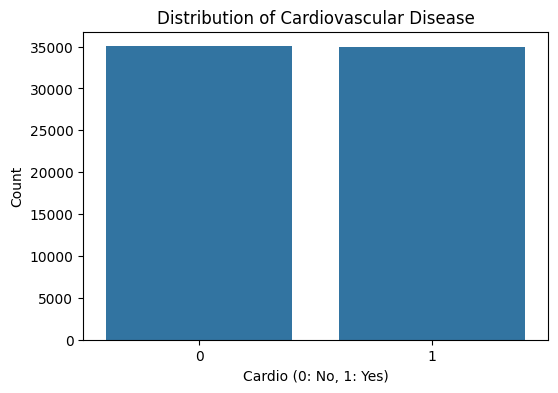

In [4]:
# 1. Distribution of target variable (e.g., 'cardio')
plt.figure(figsize=(6, 4))
sns.countplot(x='cardio', data=cardio_data)
plt.title('Distribution of Cardiovascular Disease')
plt.xlabel('Cardio (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

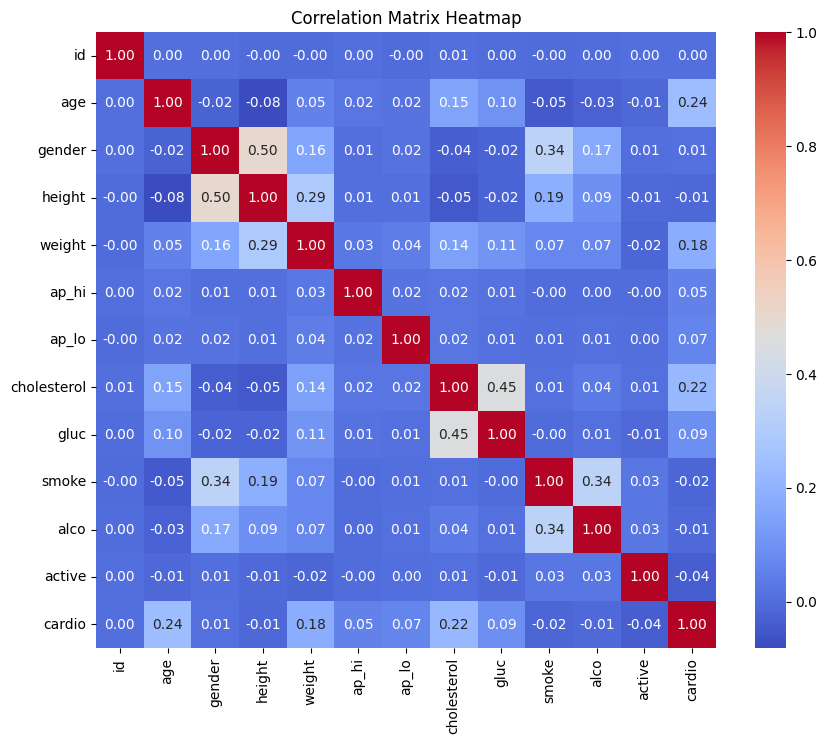

In [5]:
# 2. Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

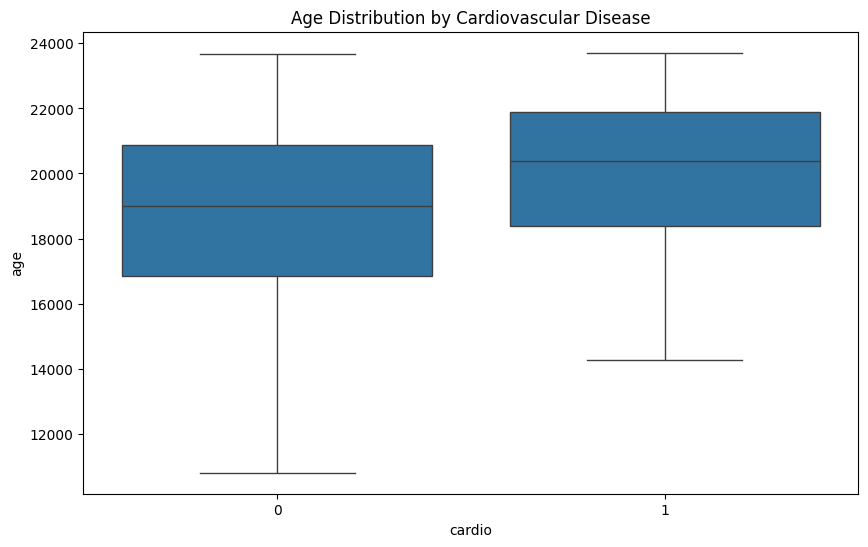

In [6]:
# 4. Boxplot to visualize the distribution of a numerical feature across categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='cardio', y='age', data=cardio_data)
plt.title('Age Distribution by Cardiovascular Disease')
plt.show()

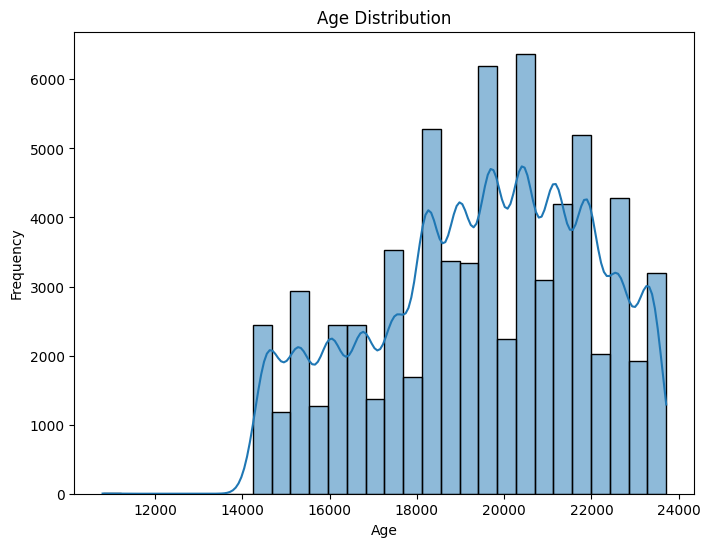

In [7]:
# 5. Histogram of a specific numerical feature
plt.figure(figsize=(8, 6))
sns.histplot(cardio_data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

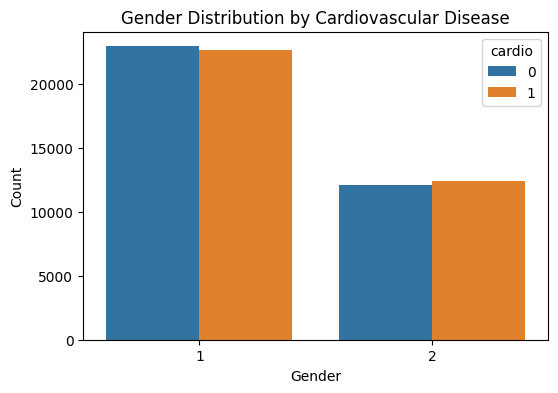

In [8]:
# 6. Bar plot of categorical feature
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=cardio_data, hue='cardio')
plt.title('Gender Distribution by Cardiovascular Disease')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [9]:
#eliminating id
df=cardio_data.iloc[:,1:]
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [10]:
#Sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from matplotlib.cm import rainbow

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [11]:
#Dividing into training testing classes
x=df.drop(['cardio'],axis=1)
y=df['cardio']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)
print('xtrain: ',xtrain.shape,'\nxtest: ',xtest.shape,'\nytrain: ',ytrain.shape,'\nytest: ',ytest.shape)

xtrain:  (49000, 11) 
xtest:  (21000, 11) 
ytrain:  (49000,) 
ytest:  (21000,)


## Model Building

#### KNN Algorithm

In [12]:
knn_scores=[]
#finding suitable k value
for k in range(2,21):
    knn_classifier=KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(xtrain.values,ytrain.values)
    knn_score=round(knn_classifier.score(xtest.values,ytest.values),2)
    knn_scores.append(knn_score)
knn_classifier=KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(xtrain,ytrain)
knn_score=knn_classifier.predict(xtest)
print(classification_report(ytest,knn_score))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69     10539
           1       0.69      0.66      0.67     10461

    accuracy                           0.68     21000
   macro avg       0.68      0.68      0.68     21000
weighted avg       0.68      0.68      0.68     21000



Text(0.5, 1.0, 'KNN Scores for different K Neighbours')

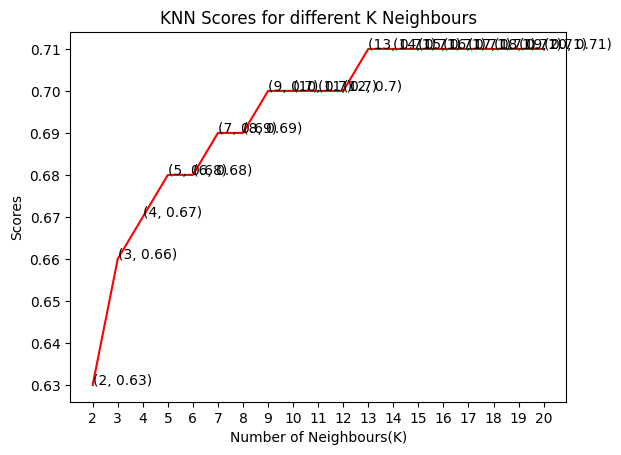

In [13]:
plt.plot([k for k in range(2,21)],knn_scores,color='red')
for i in range(2,21):
    plt.text(i,knn_scores[i-2],(i,knn_scores[i-2]))
plt.xticks([i for i in range(2,21)])
plt.xlabel("Number of Neighbours(K)")
plt.ylabel("Scores")
plt.title("KNN Scores for different K Neighbours")

In [14]:
#We pick n_neighbors=13 since it has the best accuracy according to above graph
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(xtrain,ytrain)
y_pred_knn=knn.predict(xtest)

score_knn = round(accuracy_score(y_pred_knn,ytest)*100,2)
print("Score using K Nearest Neighbors : ",score_knn)

Score using K Nearest Neighbors :  70.55


#### Random Forest Classifier

In [15]:
rf_scores=[]
#To find most suitable number of trees
estimators=[10,20,100,200,500]
for i in estimators:
    rf_classifier=RandomForestClassifier(n_estimators=i,random_state=0)
    rf_classifier.fit(xtrain.values,ytrain.values)
    rf_scores.append(round(rf_classifier.score(xtest.values,ytest.values),2))

Text(0.5, 1.0, 'Random Forest Classifier scores for different no. of estimators')

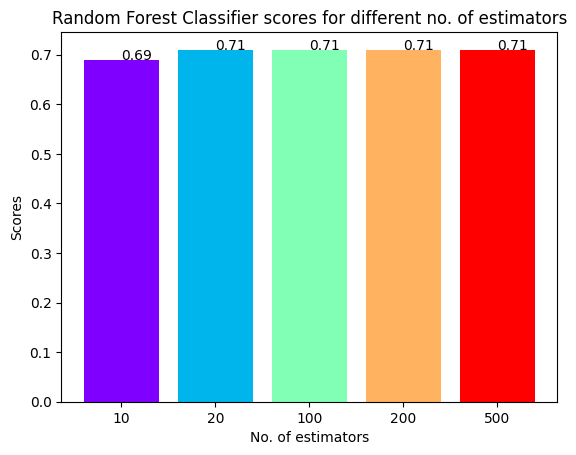

In [16]:
c=rainbow(np.linspace(0,1,len(estimators)))
plt.bar([i for i in range(len(estimators))],rf_scores,color=c,width=0.8)
for i in range(len(estimators)):
    plt.text(i,rf_scores[i],rf_scores[i])
plt.xticks(ticks=[i for i in range(len(estimators))],labels=[str(estimator) for estimator in estimators])
plt.xlabel("No. of estimators")
plt.ylabel("Scores")
plt.title("Random Forest Classifier scores for different no. of estimators")

In [ ]:
#Highest accuracy is with 20,100,200 or 500 estimators, lets take n_estimators=100
max_acc=0
#Going through many random states
for t in range(10):
    rf=RandomForestClassifier(n_estimators=100,random_state=t)
    rf.fit(xtrain,ytrain)
    y_pred_rf=rf.predict(xtest)
    curr=round(accuracy_score(y_pred_rf,ytest)*100,2)
    if (curr>max_acc):
        max_acc=curr
        best_x=t
print("Accuracy is ",max_acc, "for random state x=",best_x)

In [ ]:
rf = RandomForestClassifier(n_estimators=100,random_state=best_x)
rf.fit(xtrain,ytrain)
y_pred_rf = rf.predict(xtest)
score_rf = round(accuracy_score(y_pred_rf,ytest)*100,2)
print("Score using Random Forest Classifier: ",score_rf)

#### Decision Tree Classifier

In [19]:
dt_scores=[]
for i in range(1,len(x.columns)+1):
    dt=DecisionTreeClassifier(max_features=i,random_state=0)
    dt.fit(xtrain,ytrain)
    dt_scores.append(round(dt.score(xtest,ytest),2))
print("Scores for different number of max features",dt_scores)
    

Scores for different number of max features [0.63, 0.64, 0.63, 0.63, 0.64, 0.63, 0.63, 0.64, 0.63, 0.63, 0.63]


Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of max features: ')

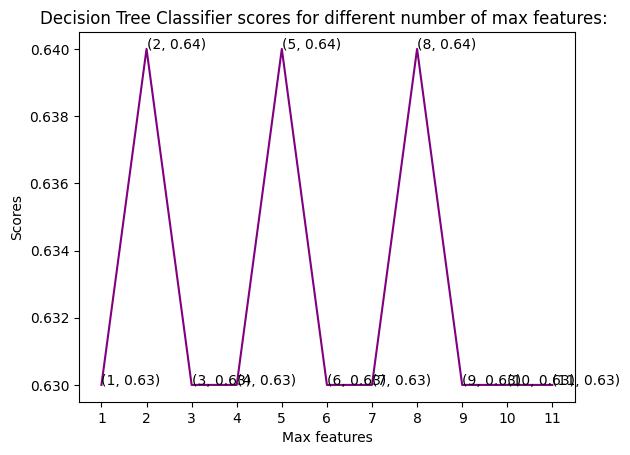

In [20]:
plt.plot([i for i in range(1,len(x.columns)+1)],dt_scores,color='purple')
for i in range(1,len(x.columns)+1):
    plt.text(i,dt_scores[i-1],(i,dt_scores[i-1]))
plt.xticks([i for i in range(1,len(x.columns)+1)])
plt.xlabel("Max features")
plt.ylabel("Scores")
plt.title("Decision Tree Classifier scores for different number of max features: ")


In [21]:
#According to above plot we can take number of max features as either 2,5 or 8.
#Lets take max_features=8
dt=DecisionTreeClassifier(max_features=8,random_state=0)
dt.fit(xtrain,ytrain)

y_pred_dt = dt.predict(xtest)
score_dt = round(accuracy_score(y_pred_dt,ytest)*100,2)
print("Score using Decision Tree Classifier: ",score_dt)

Score using Decision Tree Classifier:  63.8


#### Logistic Regression

In [22]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
y_pred_lr=lr.predict(xtest)
score_lr = round(accuracy_score(y_pred_lr,ytest)*100,2)
print("Score using Logistic Regression: ",score_lr)

Score using Logistic Regression:  70.32


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Support Vector Machine

In [25]:
#Note: Training this model takes more time than others due to size of dataset
svm=SVC(kernel='linear')
svm.fit(xtrain.values,ytrain.values)
y_pred_svm = svm.predict(xtest)
score_svm = round(accuracy_score(y_pred_svm,ytest)*100,2)
print("Score using Support Vector Machine: ",score_svm)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Score using Random Forest Classifier:  72.26


### Output Final Scores

In [26]:
scores = [score_lr,score_svm,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 70.32 %
The accuracy score achieved using Support Vector Machine is: 72.26 %
The accuracy score achieved using K-Nearest Neighbors is: 70.55 %
The accuracy score achieved using Decision Tree is: 63.8 %
The accuracy score achieved using Random Forest is: 71.51 %


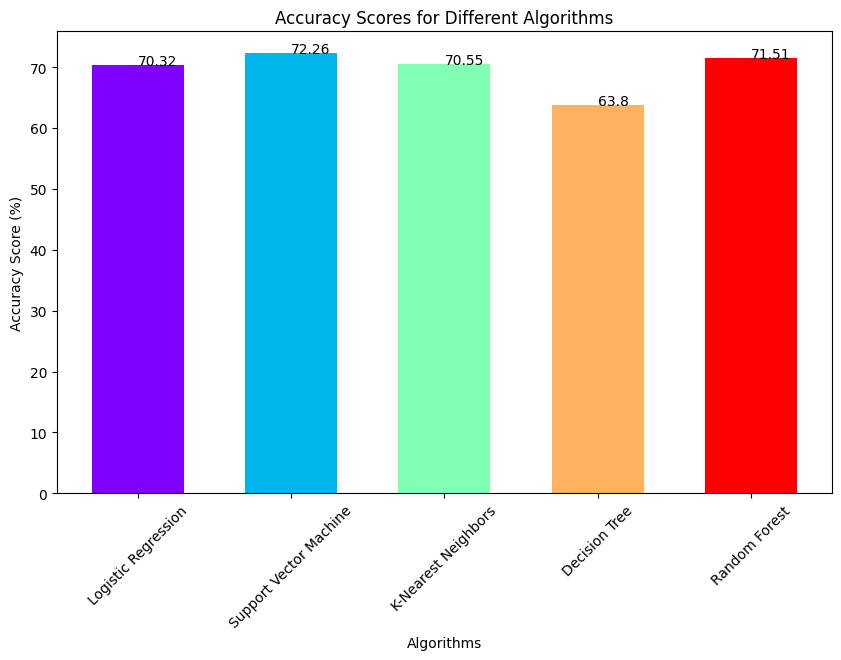

In [27]:
plt.figure(figsize=(10, 6))
c=rainbow(np.linspace(0,1,len(estimators)))
plt.bar(algorithms, scores, color=c,width=0.6)
for i in range(len(scores)):
    plt.text(i,scores[i],scores[i])
# Add labels and title
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score (%)')
plt.title('Accuracy Scores for Different Algorithms')

# Display the plot
plt.xticks(rotation=45)
plt.show()

## From above accuracy models we can see that best accuracy is from Support Vector Machine Model with accuracy=72.26%


In [ ]:
#11
print(svm.predict([[]]))